In [6]:
!pip install opencv-python
!pip install scikit-image

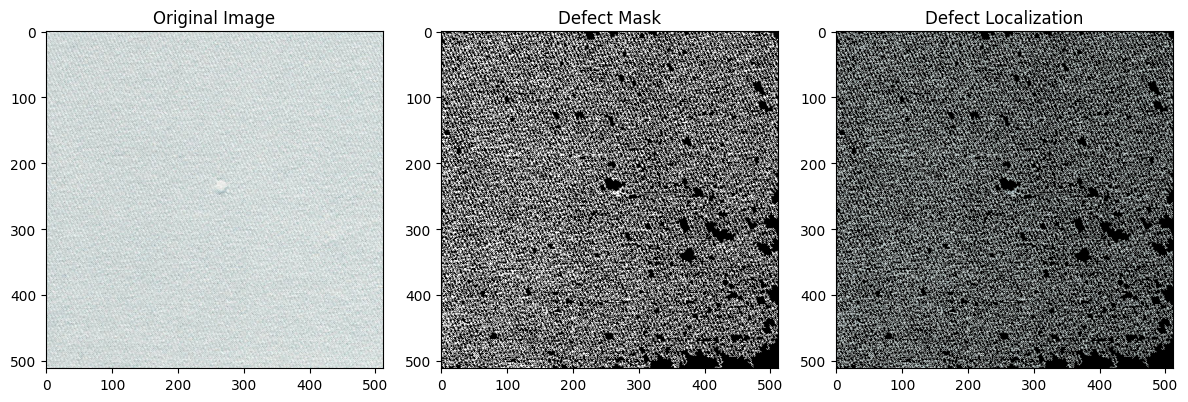

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure

def detect_defect(image_path):
    # Load the fabric image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply image segmentation
    binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Label connected components
    labels = measure.label(binary, connectivity=2)
    mask = np.zeros(binary.shape, dtype="uint8")

    # Loop over unique labels
    for label in np.unique(labels):
        if label == 0:
            continue

        # Create a binary mask for the label
        label_mask = np.zeros(binary.shape, dtype="uint8")
        label_mask[labels == label] = 255

        # Find contours and calculate the contour area
        contours, _ = cv2.findContours(label_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contour_area = cv2.contourArea(contours[0])

        # Check if the contour area is above a threshold
        if contour_area > 100:
            # Add the contour mask to the overall defect mask
            mask = cv2.add(mask, label_mask)

    # Apply the defect mask to the original image
    masked_image = cv2.bitwise_and(image, image, mask=mask)

    # Plot the original image, defect mask, and masked image
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original Image")
    ax[1].imshow(mask, cmap="gray")
    ax[1].set_title("Defect Mask")
    ax[2].imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    ax[2].set_title("Defect Localization")
    plt.tight_layout()
    plt.show()

image_path = "/content/Fabric3.jpg"  # Replace with your fabric image path
detect_defect(image_path)